In [1]:
import pandas as pd
import pylab as plt
from tusp import string2ts, ts2string
from bot import prepareData,marketReturn,ml_init_time,run_strategy, makeVolatility
import numpy as np
import json
%matplotlib inline
plt.rcParams['figure.figsize'] = 15, 8

pair="USDT_ETH"
pair2 = "BTC_XMR"
pair3 = "BTC_ETH"
pair4 = "BTC_STR"

start=string2ts("2017-12-24 00:00:00")
end=string2ts("2018-02-24 00:00:00")
period=3600*4

# trayendo y preparando datos
df  = prepareData(pair=pair,
                  start=start,
                  end=end,
                  period=period)

# trayendo y preparando datos
df2 = prepareData(pair=pair2,
                  start=start,
                  end=end,
                  period=period)

# trayendo y preparando datos
df3  = prepareData(pair=pair3,
                  start=start,
                  end=end,
                  period=period)

# trayendo y preparando datos
df4  = prepareData(pair=pair4,
                  start=start,
                  end=end,
                  period=period)


per = 0.45
cum_return1 = marketReturn(df["close"])
#cum_return1 = marketReturn(df_train)
#cum_return2 = marketReturn(df_test) 

marketRet = marketReturn(df["close"])[-1]*100 

# calculando volatilidad en función del tamaño de las velas
df["volatility"] = makeVolatility(df,1.7)

from strategy2 import EMAvsSMA,pricevsEMA, pricevsSMA, SMAvsSMA, EMAvsSMA2
from profit import profit,profit2

#EMA_5vsSMA_13
#w = SMAvsSMA(df['close'])
#relativeReturn,v = profit(w)

#EMA_5vsSMA_13
#w9 = EMAvsSMA(df['close'])
#relativeReturn9,v9 = profit(w9)

#Precio vs SMA_20
#w3 = pricevsSMA(df['close'])
#relativeReturn3,v3 = profit(w3)

# EMA vs SMA
# 23.6
w2 = EMAvsSMA2(df['close'], df["volatility"])
relativeReturn2,v2 = profit(w2)

#ml_logreg 
# recalculando el tiempo inicial en virtud del entrenamiento del
# algoritmo 
start2 = ml_init_time(end,start,per)
# cargando y preparando datos
df12 = prepareData(pair=pair, start=start2, end=end, period=period)
w4, t = run_strategy("ml_logreg",df12,pair,True,per)
relativeReturn4,v4 = profit(w4)
#w5, t = run_strategy("ml_randfor",df2,pair,True,per)
#relativeReturn5,v5 = profit(w5)
w6, t = run_strategy("ml_knn",df12,pair,True,per)
relativeReturn6,v6 = profit(w6)

w7, t = run_strategy("ml_mlpc",df12,pair,True,per)
relativeReturn7,v7 = profit(w7)

w8, t = run_strategy("ml_bm",df12,pair,True,per)
relativeReturn8,v8 = profit(w8)

returns1 = pd.DataFrame(index=df.index)

returns1["knn"] = v6*100
returns1["sma2"] = v2*100

returns1.fillna(method='bfill', inplace=True)
# Guardando los datos como lista de diccionarios en un archivo de texto
# esto permite acceder a ellos y trabajar como data frame offline

 
    
print "\n\t%s\n"%pair
print 'Retorno del mercacdo: %s'%(marketRet)
print 'Retorno de EMA vs SMA2: %s'%(relativeReturn2*100)
print 'Retorno de ml_logreg: %s'%(relativeReturn4*100)
print 'Retorno de ml_knn: %s'%(relativeReturn6*100)
print 'Retorno de ml_mlpc: %s'%(relativeReturn7*100)
print 'Retorno de ml_bm: %s'%(relativeReturn8*100)

indicators.py:29: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,min_periods=0,adjust=True,com=14).mean()
  roll_up1 = pd.stats.moments.ewma(up, window_length)
indicators.py:30: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,min_periods=0,adjust=True,com=14).mean()
  roll_down1 = pd.stats.moments.ewma(down.abs(), window_length)
indicators.py:42: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=14,center=False).mean()
  roll_up2 = pd.rolling_mean(up, window_length)
indicators.py:43: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=14,center=False).mean()
  roll_down2 = pd.rolling_mean(down.abs(), window_length)



	USDT_ETH

Retorno del mercacdo: 42.6748009831
Retorno de EMA vs SMA2: 62.130869835
Retorno de ml_logreg: 20.1303964085
Retorno de ml_knn: 9.18858177484
Retorno de ml_mlpc: 58.8721814066
Retorno de ml_bm: 20.1303964085


334.8
410 410 372 372 744 0.45


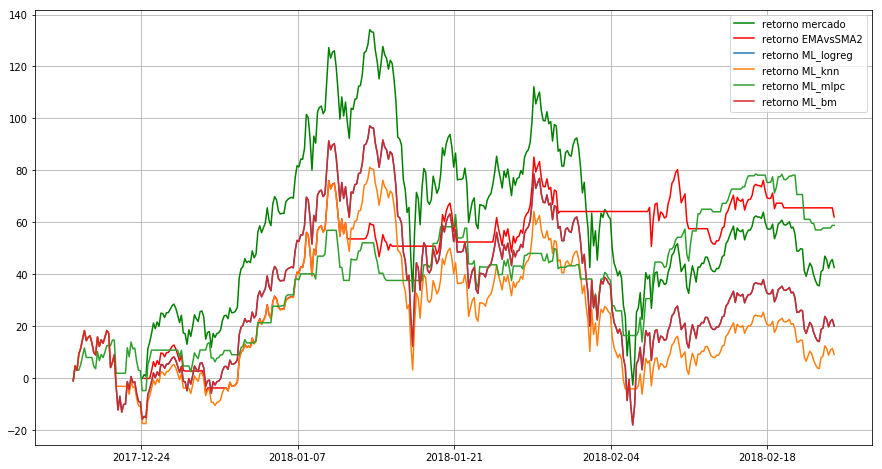

In [2]:
plt.plot(df.index[:],cum_return1*100,'g', label='retorno mercado')
#plt.plot(df.index[:],v*100,'y',label='retorno EMAvsSMA')
#plt.plot(df.index[:],v3*100,'b',label='retorno SMA_20')
plt.plot(df.index[:],v2*100,'r',label='retorno EMAvsSMA2')
plt.plot(df12.index[int(len(df12)*per):],v4*100,label='retorno ML_logreg')
#plt.plot(df2.index[int(len(df2)*per):],v5*100,label='retorno ML_randfor')
plt.plot(df12.index[int(len(df12)*per):],v6*100,label='retorno ML_knn')
plt.plot(df12.index[int(len(df12)*per):],v7*100,label='retorno ML_mlpc')
plt.plot(df12.index[int(len(df12)*per):],v8*100,label='retorno ML_bm')

plt.legend(loc='best')
plt.grid()

print len(df12)*per
print len(df12.index[int(len(df12)*per):]), len(v4), len(v2), len(df.index), len(df12.index), per

In [3]:
w2 = EMAvsSMA2(df2['close'], df2["volatility"])
relativeReturn2,v2 = profit(w2)

marketRet = marketReturn(df2["close"])[-1]*100 

# cargando y preparando datos
df22 = prepareData(pair=pair2, start=start2, end=end, period=period)
w4, t = run_strategy("ml_logreg",df22,pair2,True,per)
relativeReturn4,v4 = profit(w4)
#w5, t = run_strategy("ml_randfor",df2,pair,True,per)
#relativeReturn5,v5 = profit(w5)
w6, t = run_strategy("ml_knn",df22,pair2,True,per)
relativeReturn6,v6 = profit(w6)

w7, t = run_strategy("ml_mlpc",df22,pair2,True,per)
relativeReturn7,v7 = profit(w7)

w8, t = run_strategy("ml_bm",df22,pair2,True,per)
relativeReturn8,v8 = profit(w8)

returns2 = pd.DataFrame(index=df.index)
returns2["knn"] = v6*100
returns2["sma2"] = v2*100


print "\n\t%s\n"%pair2
print 'Retorno del mercacdo: %s'%(marketRet)
print 'Retorno de EMA vs SMA2: %s'%(relativeReturn2*100)
print 'Retorno de ml_logreg: %s'%(relativeReturn4*100)
print 'Retorno de ml_knn: %s'%(relativeReturn6*100)
print 'Retorno de ml_mlpc: %s'%(relativeReturn7*100)
print 'Retorno de ml_bm: %s'%(relativeReturn8*100)



	BTC_XMR

Retorno del mercacdo: 13.6206551
Retorno de EMA vs SMA2: -8.18663574568
Retorno de ml_logreg: 36.6237996735
Retorno de ml_knn: -11.6299741189
Retorno de ml_mlpc: -8.19353631465
Retorno de ml_bm: 31.0295723057


In [4]:
w2 = EMAvsSMA2(df3['close'], df3["volatility"])
relativeReturn2,v2 = profit(w2)

marketRet = marketReturn(df3["close"])[-1]*100 


# cargando y preparando datos
df23 = prepareData(pair=pair3, start=start2, end=end, period=period)
w4, t = run_strategy("ml_logreg",df23,pair3,True,per)
relativeReturn4,v4 = profit(w4)
#w5, t = run_strategy("ml_randfor",df2,pair,True,per)
#relativeReturn5,v5 = profit(w5)
w6, t = run_strategy("ml_knn",df23,pair3,True,per)
relativeReturn6,v6 = profit(w6)

w7, t = run_strategy("ml_mlpc",df23,pair3,True,per)
relativeReturn7,v7 = profit(w7)

w8, t = run_strategy("ml_bm",df23,pair3,True,per)
relativeReturn8,v8 = profit(w8)

returns3 = pd.DataFrame(index=df.index)
returns3["knn"] = v6*100
returns3["sma2"] = v2*100

print "\n\t%s\n"%pair3
print 'Retorno del mercacdo: %s'%(marketRet)
print 'Retorno de EMA vs SMA2: %s'%(relativeReturn2*100)
print 'Retorno de ml_logreg: %s'%(relativeReturn4*100)
print 'Retorno de ml_knn: %s'%(relativeReturn6*100)
print 'Retorno de ml_mlpc: %s'%(relativeReturn7*100)
print 'Retorno de ml_bm: %s'%(relativeReturn8*100)


	BTC_ETH

Retorno del mercacdo: 75.9156
Retorno de EMA vs SMA2: 69.2257655457
Retorno de ml_logreg: 117.898878782
Retorno de ml_knn: 109.710427346
Retorno de ml_mlpc: 133.144220597
Retorno de ml_bm: 95.5429772656


In [5]:
w2 = EMAvsSMA2(df4['close'], df4["volatility"])
relativeReturn2,v2 = profit(w2)

marketRet = marketReturn(df4["close"])[-1]*100 

# cargando y preparando datos
df24 = prepareData(pair=pair4, start=start2, end=end, period=period)
w4, t = run_strategy("ml_logreg",df24,pair4,True,per)
relativeReturn4,v4 = profit(w4)
#w5, t = run_strategy("ml_randfor",df2,pair,True,per)
#relativeReturn5,v5 = profit(w5)
w6, t = run_strategy("ml_knn",df24,pair4,True,per)
relativeReturn6,v6 = profit(w6)

w7, t = run_strategy("ml_mlpc",df24,pair4,True,per)
relativeReturn7,v7 = profit(w7)

w8, t = run_strategy("ml_bm",df24,pair4,True,per)
relativeReturn8,v8 = profit(w8)

returns4 = pd.DataFrame(index=df.index)
returns4["knn"] = v6*100
returns4["sma2"] = v2*100


print "\n\t%s\n"%pair4
print 'Retorno del mercacdo: %s'%(marketRet)
print 'Retorno de EMA vs SMA2: %s'%(relativeReturn2*100)
print 'Retorno de ml_logreg: %s'%(relativeReturn4*100)
print 'Retorno de ml_knn: %s'%(relativeReturn6*100)
print 'Retorno de ml_mlpc: %s'%(relativeReturn7*100)
print 'Retorno de ml_bm: %s'%(relativeReturn8*100)


	BTC_STR

Retorno del mercacdo: 129.044834308
Retorno de EMA vs SMA2: 104.123864604
Retorno de ml_logreg: 139.467181729
Retorno de ml_knn: 111.048765815
Retorno de ml_mlpc: 46.4260238937
Retorno de ml_bm: 85.7543514866


In [6]:
writer = pd.ExcelWriter('2w_returns.xlsx')
returns1.to_excel(writer,'%s'%pair)
returns2.to_excel(writer,'%s'%pair2)
returns3.to_excel(writer,'%s'%pair3)
returns4.to_excel(writer,'%s'%pair4)
writer.save()

In [7]:
orders = len(w4[w4["orders"] != "WAIT"])
print orders
print (relativeReturn4 - orders*0.0025)*100

54
125.967181729


In [8]:
from poloniex import Poloniex

polo = Poloniex()

markets = polo.returnTicker()
pairs = []
for name, thinks in markets.items():
    pairs.append(name)
pairs = [x for x in pairs if x.split("_")[0] == "BTC"]
print pairs

[u'BTC_CVC', u'BTC_XVC', u'BTC_PINK', u'BTC_SYS', u'BTC_EMC2', u'BTC_RADS', u'BTC_SC', u'BTC_MAID', u'BTC_BCH', u'BTC_GNT', u'BTC_BCN', u'BTC_REP', u'BTC_BCY', u'BTC_GNO', u'BTC_FCT', u'BTC_GAS', u'BTC_LBC', u'BTC_DCR', u'BTC_AMP', u'BTC_XPM', u'BTC_NXT', u'BTC_VTC', u'BTC_PASC', u'BTC_GRC', u'BTC_NXC', u'BTC_BTCD', u'BTC_LTC', u'BTC_DASH', u'BTC_STORJ', u'BTC_ZEC', u'BTC_BURST', u'BTC_BELA', u'BTC_STEEM', u'BTC_ETC', u'BTC_ETH', u'BTC_HUC', u'BTC_STRAT', u'BTC_LSK', u'BTC_EXP', u'BTC_CLAM', u'BTC_ZRX', u'BTC_BLK', u'BTC_XRP', u'BTC_NEOS', u'BTC_OMG', u'BTC_BTS', u'BTC_DOGE', u'BTC_SBD', u'BTC_XCP', u'BTC_BTM', u'BTC_OMNI', u'BTC_NAV', u'BTC_FLDC', u'BTC_XBC', u'BTC_DGB', u'BTC_VRC', u'BTC_RIC', u'BTC_STR', u'BTC_POT', u'BTC_XMR', u'BTC_VIA', u'BTC_XEM', u'BTC_NMC', u'BTC_ARDR', u'BTC_FLO', u'BTC_GAME', u'BTC_PPC']


In [9]:
markets_returns = []
EMAvsSMA2_returns = []
logreg_returns = []
knn_returns = []
mlpc_returns = []
bm_returns = []

for pair in pairs:

    df4  = prepareData(pair=pair,
                      start=start,
                      end=end,
                      period=period)
    
    w2 = EMAvsSMA2(df4['close'], df4["volatility"])
    relativeReturn2,v2 = profit(w2)

    marketRet = marketReturn(df4["close"])[-1]*100 

    #ml_logreg 
    # recalculando el tiempo inicial en virtud del entrenamiento del
    # algoritmo 
    start2 = ml_init_time(end,start,per)
    # cargando y preparando datos
    try:
        df24 = prepareData(pair=pair, start=start2, end=end, period=period)
    except:
        continue
    w4, t = run_strategy("ml_logreg",df24,pair,True,per)
    relativeReturn4,v4 = profit(w4)
    #w5, t = run_strategy("ml_randfor",df2,pair,True,per)
    #relativeReturn5,v5 = profit(w5)
    w6, t = run_strategy("ml_knn",df24,pair,True,per)
    relativeReturn6,v6 = profit(w6)

    w7, t = run_strategy("ml_mlpc",df24,pair,True,per)
    relativeReturn7,v7 = profit(w7)
    #w5, t = run_strategy("ml_randfor",df2,pair,True,per)
    #relativeReturn5,v5 = profit(w5)
    w8, t = run_strategy("ml_bm",df24,pair,True,per)
    relativeReturn8,v8 = profit(w8)

    returns4 = pd.DataFrame(index=df.index)
    returns4["knn"] = v6*100
    returns4["sma2"] = v2*100

    markets_returns.append([pair, round(marketRet,2), round(marketRet,2)])
    EMAvsSMA2_returns.append([pair, round(relativeReturn2*100,2), round(relativeReturn2*100-marketRet,2)])
    logreg_returns.append([pair, round(relativeReturn4*100,2), round(relativeReturn4*100-marketRet,2)])
    knn_returns.append([pair, round(relativeReturn6*100,2), round(relativeReturn6*100-marketRet)])
    mlpc_returns.append([pair, round(relativeReturn7*100,2), round(relativeReturn7*100-marketRet)])
    bm_returns.append([pair, round(relativeReturn8*100,2), round(relativeReturn8*100-marketRet)])
    """
    print "\n\t%s\n"%pair
    print 'Retorno del mercacdo: %s'%(round(marketRet,2))
    #print 'Retorno de SMA vs SMA: %s'%(relativeReturn*100)
    #print 'Retorno de EMA vs SMA: %s'%(relativeReturn9*100)
    #print 'Retorno de Precio vs SMA20: %s'%(relativeReturn3*100)
    print 'Retorno de EMA vs SMA2: %s'%(round(relativeReturn2*100,2))
    print 'Retorno de ml_logreg: %s'%(round(relativeReturn4*100,2))
    #print 'Retorno de ml_randfor: %s'%(relativeReturn5*100)
    print 'Retorno de ml_knn: %s'%(round(relativeReturn6*100,2))"""

In [14]:
strat = [markets_returns, EMAvsSMA2_returns, logreg_returns, knn_returns, mlpc_returns, bm_returns]
print "Mejores pares según retorno"
for st in strat:
    st.sort(key = lambda l:l[1], reverse=False)
    print "\n",st[0:5],"\n"

Mejores pares según retorno

[[u'BTC_NXT', -83.95, -83.95], [u'BTC_ARDR', -65.4, -65.4], [u'BTC_BTCD', -54.7, -54.7], [u'BTC_EMC2', -54.6, -54.6], [u'BTC_SBD', -45.33, -45.33]] 


[[u'BTC_BLK', -54.22, -30.78], [u'BTC_MAID', -53.22, -20.26], [u'BTC_EXP', -52.3, -36.68], [u'BTC_VIA', -48.59, -83.88], [u'BTC_ARDR', -45.01, 20.39]] 


[[u'BTC_EMC2', -52.69, 1.91], [u'BTC_PPC', -22.62, -24.44], [u'BTC_PINK', -22.45, 1.54], [u'BTC_POT', -19.9, 4.61], [u'BTC_DGB', -18.96, 14.77]] 


[[u'BTC_EMC2', -61.92, -7.0], [u'BTC_SBD', -36.61, 9.0], [u'BTC_VTC', -31.22, -4.0], [u'BTC_STRAT', -30.87, -6.0], [u'BTC_RIC', -28.54, -41.0]] 


[[u'BTC_VRC', -72.29, -81.0], [u'BTC_BCN', -45.42, -63.0], [u'BTC_OMNI', -40.42, -27.0], [u'BTC_EMC2', -39.1, 15.0], [u'BTC_VTC', -30.91, -4.0]] 


[[u'BTC_EXP', -34.4, -19.0], [u'BTC_NAV', -30.63, -45.0], [u'BTC_POT', -24.41, 0.0], [u'BTC_RIC', -16.58, -29.0], [u'BTC_ARDR', -14.32, 51.0]] 



In [15]:
print "Mejores estrategias vs retorno del mercado"
for st in strat:
    st.sort(key = lambda l:l[2], reverse=False)
    print "\n",st[0:6],"\n"

Mejores estrategias vs retorno del mercado

[[u'BTC_NXT', -83.95, -83.95], [u'BTC_ARDR', -65.4, -65.4], [u'BTC_BTCD', -54.7, -54.7], [u'BTC_EMC2', -54.6, -54.6], [u'BTC_SBD', -45.33, -45.33], [u'BTC_BTS', -41.49, -41.49]] 


[[u'BTC_ZRX', 20.31, -95.67], [u'BTC_VIA', -48.59, -83.88], [u'BTC_SYS', -33.56, -81.75], [u'BTC_XPM', 46.42, -62.43], [u'BTC_GAS', 43.59, -60.28], [u'BTC_LSK', 5.29, -49.14]] 


[[u'BTC_XPM', -4.95, -113.8], [u'BTC_GAS', 0.0, -103.87], [u'BTC_ZRX', 29.44, -86.55], [u'BTC_SYS', -6.53, -54.73], [u'BTC_OMG', 29.87, -47.62], [u'BTC_VIA', -9.92, -45.21]] 


[[u'BTC_XPM', -15.94, -125.0], [u'BTC_ZRX', 15.05, -101.0], [u'BTC_GAS', 13.91, -90.0], [u'BTC_PASC', -5.47, -45.0], [u'BTC_RIC', -28.54, -41.0], [u'BTC_OMG', 36.8, -41.0]] 


[[u'BTC_GAS', -3.11, -107.0], [u'BTC_XPM', 6.87, -102.0], [u'BTC_ZRX', 17.25, -99.0], [u'BTC_STR', 46.43, -83.0], [u'BTC_VRC', -72.29, -81.0], [u'BTC_OMG', -0.42, -78.0]] 


[[u'BTC_ZRX', 0.0, -116.0], [u'BTC_XPM', 0.0, -109.0], [u'BTC_GAS', -

# Dependencia del profit con el porcentaje de  datos test/train

150 150


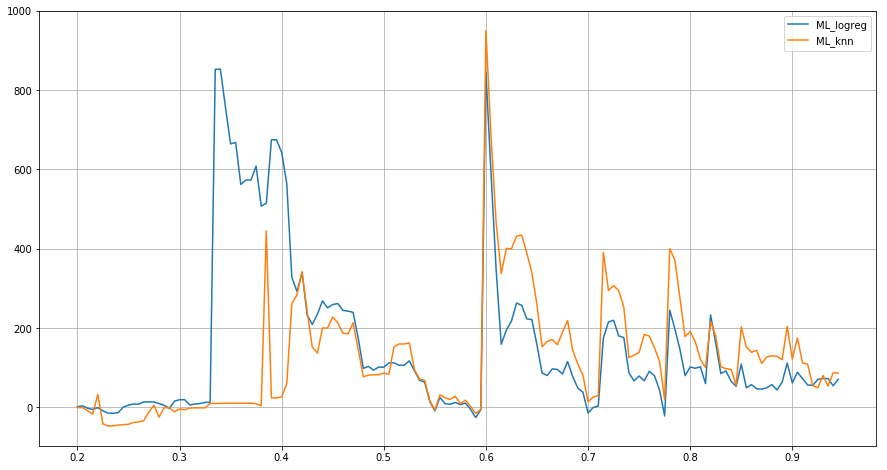

In [12]:
pers = np.arange(0.20, 0.95, 0.005)
log_reg = []
knn =  []

for per in pers:
    # recalculando el tiempo inicial en virtud del entrenamiento del
    # algoritmo 
    start2 = ml_init_time(end,start,per)
    # cargando y preparando datos
    df12 = prepareData(pair="BTC_XRP", start=start2, end=end, period=period)

    w4, t = run_strategy("ml_logreg",df12,pair,True,per)
    relativeReturn4,v4 = profit(w4)
    log_reg.append(relativeReturn4*100)

    w6, t = run_strategy("ml_knn",df12,pair,True,per)
    relativeReturn6,v6 = profit(w6)
    knn.append(relativeReturn6*100)

print len(pers), len(log_reg)
plt.plot(pers,log_reg,label='ML_logreg')
plt.plot(pers,knn,label='ML_knn')
plt.legend(loc='best')
plt.grid()

150 150


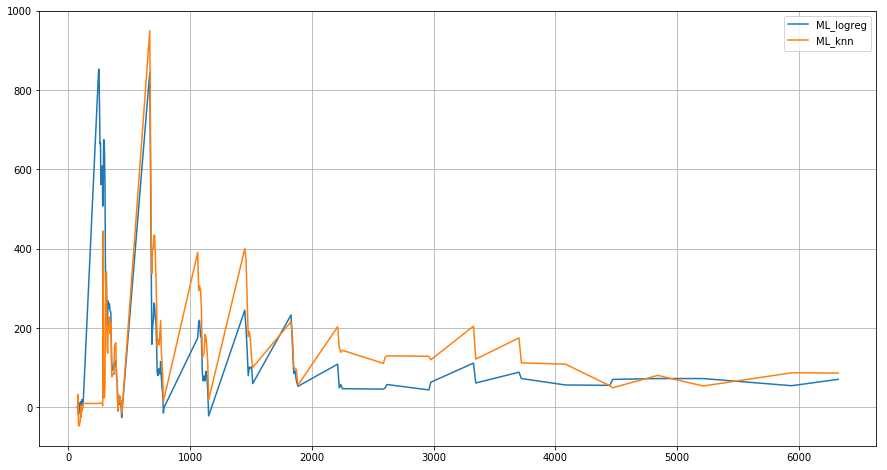

In [13]:
pers = np.arange(0.20, 0.95, 0.005)
train = []
log_reg = []
knn =  []

for per in pers:
    # recalculando el tiempo inicial en virtud del entrenamiento del
    # algoritmo 
    start2 = ml_init_time(end,start,per)
    # cargando y preparando datos
    df12 = prepareData(pair="BTC_XRP", start=start2, end=end, period=period)
    
    train.append(len(df12[1:int(len(df12)*per)]))

    w4, t = run_strategy("ml_logreg",df12,pair,True,per)
    relativeReturn4,v4 = profit(w4)
    log_reg.append(relativeReturn4*100)

    w6, t = run_strategy("ml_knn",df12,pair,True,per)
    relativeReturn6,v6 = profit(w6)
    knn.append(relativeReturn6*100)

print len(pers), len(log_reg)
plt.plot(train,log_reg,label='ML_logreg')
plt.plot(train,knn,label='ML_knn')
plt.legend(loc='best')
plt.grid()